In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Environment setup
n_states = 5  # States: 1, 2, ..., 5
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate

In [4]:
# Initialize value function
V = np.zeros(n_states)  

In [5]:
# Define the environment dynamics
def step(state, action):
    """Simulate environment dynamics."""
    if action == "left":
        next_state = max(0, state - 1)
    elif action == "right":
        next_state = min(n_states - 1, state + 1)
    else:
        raise ValueError("Invalid action")
    
    # Reward is +1 only in the last state
    reward = 1 if next_state == n_states - 1 else 0
    return next_state, reward

In [6]:
# TD(0) algorithm
episodes = 100  # Number of episodes
snapshots = []  # Store V for visualization

In [7]:
for ep in range(episodes):
    # Start in a random state
    state = np.random.randint(0, n_states)
    
    while True:
        # Select a random action
        action = np.random.choice(["left", "right"])
        
        # Take the action, observe next state and reward
        next_state, reward = step(state, action)
        
        # TD(0) update
        td_target = reward + gamma * V[next_state]
        td_error = td_target - V[state]
        V[state] += alpha * td_error
        
        # Terminate if in the terminal state (state 5)
        if state == n_states - 1:
            break
        
        # Move to the next state
        state = next_state
    
    # Store value function every 10 episodes
    if ep % 10 == 0:
        snapshots.append(V.copy())

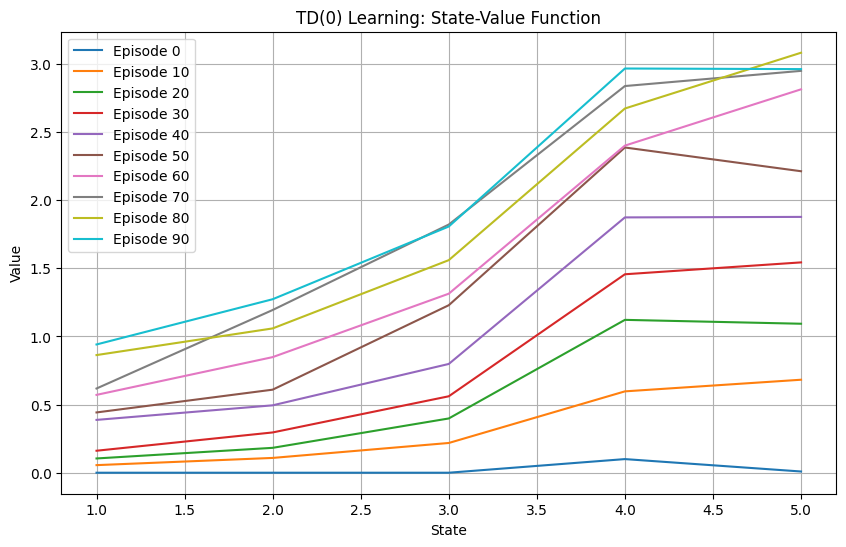

In [8]:
# Visualization
plt.figure(figsize=(10, 6))
for i, snapshot in enumerate(snapshots):
    plt.plot(range(1, n_states + 1), snapshot, label=f'Episode {i * 10}')
plt.xlabel('State')
plt.ylabel('Value')
plt.title('TD(0) Learning: State-Value Function')
plt.legend()
plt.grid()
plt.show()